# Trigonometry

Very often in a radio we need to compute the magnitude or phase of a wave (represented in the complex domain). 

This can be expensive to do precisely, but approximations are usually good enough for our purposes.

Per usual, we should start off with some imports:

In [1]:
%matplotlib inline
import numpy as np
from numpy.fft import fft, fftfreq
import matplotlib.pyplot as plt

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from alldigitalradio.trig import MagnitudeApproximator
from alldigitalradio.io.numpy import make_callable, take_n

# Magnitude

Magnitude, or more formally "L2 Norm" requires squaring and square roots (and also addition, but that's cheap).

I found in some paper I've long forgotten an approximation I think pulled from a textbook that is implemented entirely with comparisons, adders and shifts.

To evaluate this, let's generate a sweep from zero to 2pi in the complex domain.

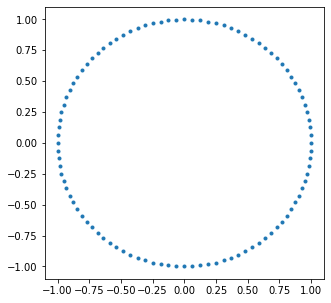

In [2]:
inputs = np.exp(1j*(np.arange(0, 2*np.pi, 2*np.pi/100)))
plt.figure(figsize=(5,5))
plt.plot(np.real(inputs), np.imag(inputs), '.')

Now let's push this through the `MagnitudeApproximator`

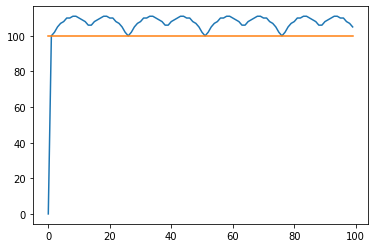

In [9]:
approximator = make_callable(MagnitudeApproximator())

plt.plot([approximator(int(np.real(s)*100), int(np.imag(s)*100)) for s in inputs])
plt.plot(np.abs(inputs*100))

All in all, we can see a decent amount of error, but it's directionally correct enough for our purposes.

# Phase

The traditional way to approximate phase is to use CORDIC, but I've yet to need calculate phase.